<a href="https://colab.research.google.com/github/suadamohammed/pandas/blob/main/New_Pandas_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the necessary libraries

In [ ]:
import pandas as pd

Mount the google drive and set your path to the parent directory where you save your dataset

In [ ]:
 from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd '/content/drive/MyDrive/workshops'

/content/drive/MyDrive/workshops


Reading the .csv file

In [ ]:
ls

Salaries.csv  suada-Pandas_Matplotlib.pptx


In [ ]:
df=pd.read_csv("Salaries.csv")
print(df)

         rank discipline  phd  service     sex  salary
0        Prof          B   56       49    Male  186960
1        Prof          A   12        6    Male   93000
2        Prof          A   23       20    Male  110515
3        Prof          A   40       31    Male  131205
4        Prof          B   20       18    Male  104800
..        ...        ...  ...      ...     ...     ...
73       Prof          B   18       10  Female  105450
74  AssocProf          B   19        6  Female  104542
75       Prof          B   17       17  Female  124312
76       Prof          A   28       14  Female  109954
77       Prof          A   23       15  Female  109646

[78 rows x 6 columns]


Exploring the dataframes

In [ ]:
df.head()

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800


In [ ]:
df.tail()

,rank,discipline,phd,service,sex,salary
73,Prof,B,18,10,Female,105450
74,AssocProf,B,19,6,Female,104542
75,Prof,B,17,17,Female,124312
76,Prof,A,28,14,Female,109954
77,Prof,A,23,15,Female,109646


In [ ]:
df.columns
print(df[['phd','rank']])

    phd       rank
0    56       Prof
1    12       Prof
2    23       Prof
3    40       Prof
4    20       Prof
..  ...        ...
73   18       Prof
74   19  AssocProf
75   17       Prof
76   28       Prof
77   23       Prof

[78 rows x 2 columns]


In [ ]:
print(df['rank'].dtype)

object


Data Frames attributes


In [ ]:
df.dtypes

rank          object
discipline    object
phd            int64
service        int64
sex           object
salary         int64
dtype: object

In [ ]:
df.shape

(78, 6)

Data Frames methods

In [ ]:
print(df.mean())

phd            19.705128
service        15.051282
salary     108023.782051
dtype: float64


<ipython-input-23-f98cceecb4a0>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.mean())


Selecting a column in a Data Frame

In [ ]:
print(df['sex'])
print(df.sex)

0       Male
1       Male
2       Male
3       Male
4       Male
       ...  
73    Female
74    Female
75    Female
76    Female
77    Female
Name: sex, Length: 78, dtype: object
0       Male
1       Male
2       Male
3       Male
4       Male
       ...  
73    Female
74    Female
75    Female
76    Female
77    Female
Name: sex, Length: 78, dtype: object


In [ ]:
df['salary'].mean()


108023.78205128205

Data Frames groupby method

In [ ]:
#Group data using rank
df_rank = df.groupby(['rank'])
#Calculate mean value for each numeric column per each group
df_rank.mean()


,phd,service,salary
rank,,,
AssocProf,15.076923,11.307692,91786.230769
AsstProf,5.052632,2.210526,81362.789474
Prof,27.065217,21.413043,123624.804348


In [ ]:
#Calculate mean salary for each professor rank:
df.groupby('rank')[['salary']].mean()

,salary
rank,
AssocProf,91786.230769
AsstProf,81362.789474
Prof,123624.804348


In [ ]:
#pass sort=False for potential speedup:
df_rank=df.groupby(['rank'],sort=False)[['salary']]
print(df_rank.mean())

                  salary
rank                    
Prof       123624.804348
AssocProf   91786.230769
AsstProf    81362.789474


Data Frame: filtering

In [ ]:
#Calculate mean salary for each professor rank:
df_sub = df[ df['salary'] > 120000 ]

In [ ]:
#Select only those rows that contain female professors:
df_f = df[ df['sex'] == 'Female' ]

Data Frames: Slicing

In [ ]:
#Select column salary:
df['salary']

0     186960
1      93000
2     110515
3     131205
4     104800
       ...  
73    105450
74    104542
75    124312
76    109954
77    109646
Name: salary, Length: 78, dtype: int64

In [ ]:
#Select column salary:
df[['rank','salary']]

,rank,salary
0,Prof,186960
1,Prof,93000
2,Prof,110515
3,Prof,131205
4,Prof,104800
...,...,...
73,Prof,105450
74,AssocProf,104542
75,Prof,124312
76,Prof,109954


In [ ]:
#Select rows by their position-[starting_row:ending_row]
df[10:20]

,rank,discipline,phd,service,sex,salary
10,Prof,B,39,33,Male,128250
11,Prof,B,23,23,Male,134778
12,AsstProf,B,1,0,Male,88000
13,Prof,B,35,33,Male,162200
14,Prof,B,25,19,Male,153750
15,Prof,B,17,3,Male,150480
16,AsstProf,B,8,3,Male,75044
17,AsstProf,B,4,0,Male,92000
18,Prof,A,19,7,Male,107300
19,Prof,A,29,27,Male,150500


In [ ]:
#Select rows by their labels:
df_sub.loc[10:20,['rank','sex','salary']]

,rank,sex,salary
10,Prof,Male,128250
11,Prof,Male,134778
13,Prof,Male,162200
14,Prof,Male,153750
15,Prof,Male,150480
19,Prof,Male,150500


In [ ]:
#Select rows by their labels:
df_sub.loc[10:20,['rank','sex','salary']]

,rank,sex,salary
10,Prof,Male,128250
11,Prof,Male,134778
13,Prof,Male,162200
14,Prof,Male,153750
15,Prof,Male,150480
19,Prof,Male,150500


In [ ]:
#Select rows by their labels:
df_sub.iloc[10:20,[0, 3, 4, 5]]

,rank,service,sex,salary
26,Prof,19,Male,148750
27,Prof,43,Male,155865
29,Prof,20,Male,123683
31,Prof,21,Male,155750
35,Prof,23,Male,126933
36,Prof,45,Male,146856
39,Prof,18,Female,129000
40,Prof,36,Female,137000
44,Prof,19,Female,151768
45,Prof,25,Female,140096


In [ ]:
df.iloc[0]  # First row of a data frame
# df.iloc[i]  #(i+1)th row 
# df.iloc[-1] # Last row 

rank            Prof
discipline         B
phd               56
service           49
sex             Male
salary        186960
Name: 0, dtype: object

In [ ]:
df.iloc[:, 0]  # First column
# df.iloc[:, -1] # Last column 

0          Prof
1          Prof
2          Prof
3          Prof
4          Prof
        ...    
73         Prof
74    AssocProf
75         Prof
76         Prof
77         Prof
Name: rank, Length: 78, dtype: object

In [ ]:
df.iloc[0:7]       #First 7 rows 
# df.iloc[:, 0:2]    #First 2 columns
# df.iloc[1:3, 0:2]  #Second through third rows and first 2 columns
# df.iloc[[0,5], [1,3]]  #1st and 6th rows and 2nd and 4th columns

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800
5,Prof,A,20,20,Male,122400
6,AssocProf,A,20,17,Male,81285


In [ ]:
# Create a new data frame from the original sorted by the column Salary
df_sorted = df.sort_values( by ='service')
df_sorted.head()


,rank,discipline,phd,service,sex,salary
55,AsstProf,A,2,0,Female,72500
23,AsstProf,A,2,0,Male,85000
43,AsstProf,B,5,0,Female,77000
17,AsstProf,B,4,0,Male,92000
12,AsstProf,B,1,0,Male,88000


In [ ]:
df_sorted = df.sort_values( by ='service',ascending=False)
df_sorted.head(20)

,rank,discipline,phd,service,sex,salary
9,Prof,A,51,51,Male,57800
0,Prof,B,56,49,Male,186960
36,Prof,B,45,45,Male,146856
27,Prof,A,45,43,Male,155865
40,Prof,A,39,36,Female,137000
10,Prof,B,39,33,Male,128250
13,Prof,B,35,33,Male,162200
3,Prof,A,40,31,Male,131205
25,Prof,B,35,31,Male,99418
21,Prof,A,33,30,Male,103106


In [ ]:
#sort the data using 2 or more columns:
df_sorted = df.sort_values( by =['service', 'salary'], ascending = [True, False])
df_sorted.head(10)

,rank,discipline,phd,service,sex,salary
52,Prof,A,12,0,Female,105000
17,AsstProf,B,4,0,Male,92000
12,AsstProf,B,1,0,Male,88000
23,AsstProf,A,2,0,Male,85000
43,AsstProf,B,5,0,Female,77000
55,AsstProf,A,2,0,Female,72500
57,AsstProf,A,3,1,Female,72500
28,AsstProf,B,7,2,Male,91300
42,AsstProf,B,4,2,Female,80225
68,AsstProf,A,4,2,Female,77500


Missing Values

In [ ]:
# Read a dataset with missing values
flights = pd.read_csv("flights.csv")

FileNotFoundError: ignored

In [ ]:
# Select the rows that have at least one missing value
flights[flights.isnull().any(axis=1)].head()

NameError: ignored

In [ ]:
flights[['dep_delay','arr_delay']].agg(['min','mean','max'])

,dep_delay,arr_delay
min,-43.00000,-86.000000
mean,12.63907,6.895377
max,1301.00000,1272.000000


In [ ]:
import matplotlib.pyplot as plt

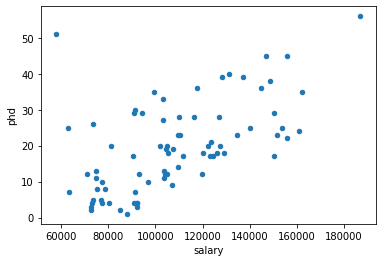

In [ ]:
df.plot(kind = 'scatter', x = 'salary', y = 'phd')
plt.show()